In [2]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 40.8 MB/s eta 0:00:00


#P1


In [3]:
#hola como estan este es una prueba de guardado en github

#P2


In [13]:
#@title Funciones útiles (no editar)
import numpy as np
import matplotlib.pyplot as plt

def generador_puntos_separados(n,seed=42):

  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [4, 4]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def generador_puntos_mezclados(n,seed=42):
  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [1,2]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def graficar(X,y,w=None,b=None):
  plt.figure(figsize=(8, 6))
  if w is not None and b is not None:
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]),100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Hiperplano separante')

  group1 = X[y == -1]
  group2 = X[y == 1]
  plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
  plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')


  # Add titles and labels
  plt.title('Separación de dos grupos')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()

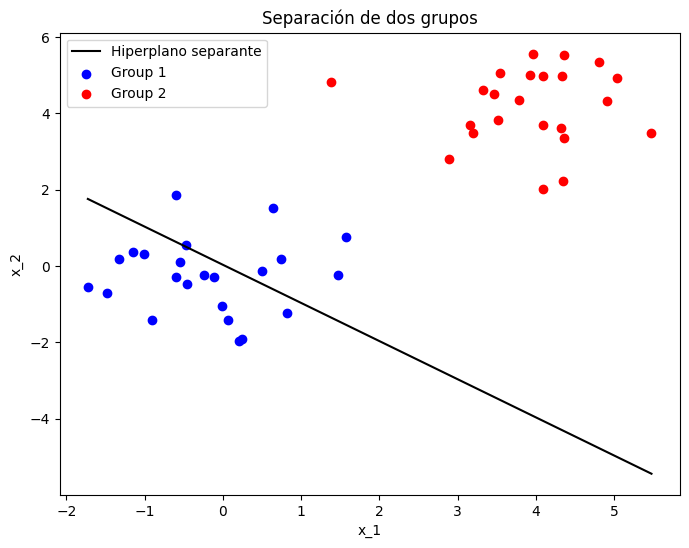

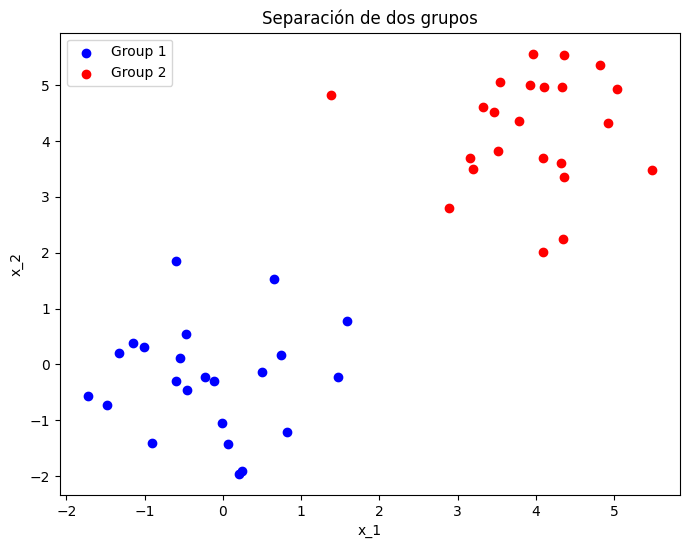

In [5]:
#Ejemplo:
X,y=generador_puntos_separados(23)
graficar(X,y,(3,3),-0.1) # Con hiperplano
graficar(X,y) # Sin hiperplano

## b)


In [6]:
from gurobipy import*

In [7]:
#para esta parte es mejor utilizar el problema de minimización, donde minimizartemos min w,b 0,5||w||^2
#sujeto a w^t x_i + b >= 1

In [23]:
def SVM_Hard(X,y):
  #detectamos la dimensión de X:
  n,d = X.shape #Esto entregara el numero de muestra y además la dimensión del vector.

  model = Model("SVM_Hard")
  model.setParam('OutputFlag',0)

  #ahora debemos definir las variables:
  #dado que el problema está minimizando dos variables, w y b necesitamos definir dos variables

  w = model.addVars(d, lb =- GRB.INFINITY, name = 'w') #w tiene que ser de dimención d puesto que x lo es
  b = model.addVar(lb = -GRB.INFINITY, name = 'b') # Dado que se realiza un producto punto en la restricción este es de dimención 1

  model.update() #guardamos las actualizaciones del modelo.

  #función objetivo:

  model.setObjective(quicksum(w[j]*w[j] for j in range(d)) * 0.5, GRB.MINIMIZE)
  #esto minimiza la funcion objetivo que planteamos en a).

  #aplicamos la restriccion:

  for i in range(n):
      model.addConstr( y[i] * (quicksum(w[j]*X[i, j] for j in range(d)) + b) >= 1,name=f"margin_{i}")

  #Optimizamos:
  model.optimize()

  w_optimo = np.array([w[j].x for j in range(d)])
  b_optimo = b.x

  return w_optimo, b_optimo


In [26]:
#Ejemplo
X, y = generador_puntos_separados(100)
w, b = SVM_Hard(X, y)
print (w)
print (b)

[1.39468639 2.24195681]
-6.729388517937449


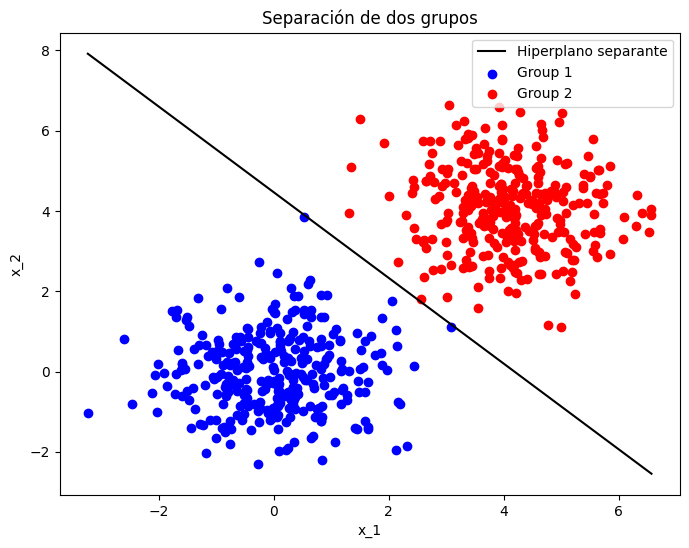

In [29]:
X, y = generador_puntos_separados(320)
w, b = SVM_Hard(X, y)
graficar(X,y,w,b)

##d)

In [ ]:
def SVM_soft(X,y,o):
  n,d = shape.X
  model = Model('SVM_soft')
  model.setParam('OutputFlag',0)
  #Deminimos las variables sobre las cuales se va a optimizar el modelo.
  w = model.addVars(d, lb = -GRB.INFINITY, name = 'w')
  b = model.addVar(lb = -GRB.INFINITY, name = 'b')
  o = model.addVars(n, lb= -GRB.INFINITY, name = 'o') #Este parametro nos permitira definir cuando castigamos los errores de clasificiación
  model.update()

  #Planteamos la función objetivo:
  model.setObjective(gp.quicksum(w[j]*w[j] for j in range(d)) * 0.5, GRB.MINIMIZE)